In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [49]:
data = pd.read_excel('index_values_202312.xlsx', index_col = 0, parse_dates = True)

In [50]:
returns = (data/data.shift(1)) - 1
returns.dropna(inplace=True)

In [51]:
returns.head()

,JPCAEU3M,LEG1TREU,LEGATREH,LG30TREH,MXWOHEUR,NDDUWI,NCUDWI,NDUEEGF
Data,,,,,,,,
1999-01-31,0.002894,0.009671,0.014568,0.007475,0.033060,0.060804,0.039463,0.027897
1999-02-28,0.002295,-0.001862,-0.014557,0.000902,-0.014425,0.003298,-0.014921,0.040799
1999-03-31,0.003112,0.006381,0.006532,0.026846,0.044016,0.061535,0.058550,0.153928
1999-04-30,0.003203,0.005820,0.006090,0.034631,0.043849,0.061479,0.100637,0.147651
1999-05-31,0.002236,0.002124,-0.007740,-0.025834,-0.030806,-0.024039,0.001808,0.007252


In [52]:
number_of_portfolios = 40000

rf = returns['JPCAEU3M'].mean() * 12
returns.drop('JPCAEU3M', axis = 1, inplace = True)
means = returns.mean() * 12

In [53]:
means

LEG1TREU    0.021341
LEGATREH    0.030544
LG30TREH    0.063099
MXWOHEUR    0.060443
NDDUWI      0.071795
NCUDWI      0.101476
NDUEEGF     0.094329
dtype: float64

In [54]:
rf

0.01738769127782572

In [56]:
stdev = returns.std()*np.sqrt(12)
stdev

LEG1TREU    0.014218
LEGATREH    0.033303
LG30TREH    0.093539
MXWOHEUR    0.144818
NDDUWI      0.145481
NCUDWI      0.170924
NDUEEGF     0.193084
dtype: float64

In [57]:
len(returns.columns)

7

In [58]:
returns.tail()

,LEG1TREU,LEGATREH,LG30TREH,MXWOHEUR,NDDUWI,NCUDWI,NDUEEGF
Data,,,,,,,
2023-08-31,0.003695,-0.002981,-0.003497,-0.018723,-0.008756,-0.023204,-0.047056
2023-09-30,-0.002450,-0.019140,-0.012404,-0.038738,-0.019529,-0.029093,-0.002123
2023-10-31,0.005422,-0.008357,-0.010109,-0.026898,-0.028740,-0.061091,-0.038581
2023-11-30,0.007274,0.032175,0.044699,0.080261,0.062115,0.061481,0.048789
2023-12-31,0.010967,0.030226,0.036364,0.040441,0.032595,0.078959,0.022752


In [59]:
means

LEG1TREU    0.021341
LEGATREH    0.030544
LG30TREH    0.063099
MXWOHEUR    0.060443
NDDUWI      0.071795
NCUDWI      0.101476
NDUEEGF     0.094329
dtype: float64

In [60]:
mat_cov = returns.cov()* 12

In [61]:
print(mat_cov)

          LEG1TREU  LEGATREH  LG30TREH  MXWOHEUR    NDDUWI    NCUDWI   NDUEEGF
LEG1TREU  0.000202  0.000310  0.000059 -0.000293 -0.000345 -0.000353 -0.000358
LEGATREH  0.000310  0.001109  0.000930  0.000384  0.000023  0.000124  0.000160
LG30TREH  0.000059  0.000930  0.008750  0.009652  0.007827  0.010243  0.011760
MXWOHEUR -0.000293  0.000384  0.009652  0.020972  0.018809  0.020347  0.020505
NDDUWI   -0.000345  0.000023  0.007827  0.018809  0.021165  0.022368  0.021480
NCUDWI   -0.000353  0.000124  0.010243  0.020347  0.022368  0.029215  0.025558
NDUEEGF  -0.000358  0.000160  0.011760  0.020505  0.021480  0.025558  0.037281


## Ottimizzazione con rendimenti storici

In [62]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(returns.columns))
    weights = np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)
    annualized_return = np.sum(means * weights)
    portfolio_returns.append(annualized_return)
    portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    sharpe_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

In [63]:
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]


In [64]:
portfolios_df

,Return,Risk,Sharpe,Weights
0,0.06535,0.087557,0.54779,"[0.147, 0.124, 0.346, 0.009, 0.06, 0.297, 0.017]"
1,0.060789,0.090436,0.479909,"[0.233, 0.045, 0.226, 0.058, 0.232, 0.069, 0.138]"
2,0.061591,0.090693,0.487391,"[0.107, 0.21, 0.158, 0.189, 0.066, 0.194, 0.075]"
3,0.069558,0.109576,0.476114,"[0.232, 0.065, 0.059, 0.081, 0.029, 0.23, 0.303]"
4,0.060192,0.08558,0.500163,"[0.14, 0.267, 0.148, 0.017, 0.095, 0.063, 0.27]"
...,...,...,...,...
39995,0.058757,0.081214,0.509389,"[0.122, 0.237, 0.204, 0.029, 0.209, 0.085, 0.113]"
39996,0.064247,0.098988,0.473391,"[0.039, 0.272, 0.08, 0.175, 0.109, 0.153, 0.171]"
39997,0.065454,0.096869,0.496197,"[0.201, 0.021, 0.289, 0.125, 0.043, 0.191, 0.13]"
39998,0.063469,0.092617,0.497545,"[0.162, 0.121, 0.257, 0.006, 0.158, 0.066, 0.23]"


#### Portafogli con ritorno maggiore dato un certo range di rischio

In [65]:
minr = float(input("Minima tolleranza al rischio: "))

maxr = float(input("Massima tolleranza al rischio: "))

Minima tolleranza al rischio:  0.06
Massima tolleranza al rischio:  0.065


In [66]:
risk_df = portfolios_df.copy()
risk_df = risk_df.drop(risk_df[(risk_df.Risk < minr) | (risk_df.Risk > maxr)].index)

In [67]:
rtn_risk_df = risk_df.sort_values(by = 'Return', ascending=False)

In [68]:
rtn_risk_df = rtn_risk_df.head(10)
rtn_risk_df

,Return,Risk,Sharpe,Weights
34370,0.05533,0.06472,0.586252,"[0.002, 0.454, 0.322, 0.022, 0.014, 0.171, 0.015]"
3319,0.054724,0.064601,0.577961,"[0.246, 0.321, 0.097, 0.005, 0.0, 0.27, 0.062]"
34566,0.054569,0.064988,0.572117,"[0.235, 0.287, 0.157, 0.005, 0.034, 0.215, 0.067]"
26996,0.054536,0.064527,0.575706,"[0.032, 0.526, 0.104, 0.01, 0.069, 0.186, 0.072]"
4577,0.054501,0.064481,0.575571,"[0.219, 0.254, 0.257, 0.029, 0.012, 0.229, 0.0]"
33695,0.054031,0.06453,0.567848,"[0.212, 0.325, 0.143, 0.014, 0.016, 0.182, 0.107]"
24312,0.053491,0.063912,0.564889,"[0.158, 0.324, 0.279, 0.003, 0.024, 0.087, 0.126]"
17376,0.053322,0.063513,0.565781,"[0.199, 0.269, 0.262, 0.003, 0.081, 0.123, 0.062]"
8992,0.053248,0.064778,0.553587,"[0.281, 0.237, 0.187, 0.011, 0.006, 0.125, 0.153]"
27828,0.053216,0.064963,0.551516,"[0.262, 0.162, 0.301, 0.001, 0.13, 0.112, 0.031]"


In [69]:
rtn_risk_df[['LEG1TREU','LEGATREH', 'LG30TREH', 'MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(rtn_risk_df.Weights.tolist(), index= rtn_risk_df.index)
rtn_risk_df.drop(['Weights'], axis=1, inplace=True)

In [70]:
rtn_risk_df.to_excel('tolerance_risk_returns.xlsx', sheet_name='Best Returns', index=False, startrow=0)

In [71]:
sharpe_risk_df = risk_df.sort_values(by = 'Sharpe', ascending=False)

In [23]:
sharpe_risk_df = sharpe_risk_df.head(10)
sharpe_risk_df

,Return,Risk,Sharpe,Weights
36711,0.039533,0.062747,0.561882,"[0.52, 0.133, 0.012, 0.128, 0.14, 0.042, 0.026]"
13935,0.03763,0.064642,0.515967,"[0.43, 0.212, 0.04, 0.084, 0.132, 0.071, 0.032]"
35256,0.03536,0.062905,0.494134,"[0.511, 0.044, 0.199, 0.074, 0.139, 0.026, 0.007]"
14082,0.035863,0.064852,0.487056,"[0.416, 0.21, 0.001, 0.031, 0.158, 0.032, 0.153]"
38676,0.032694,0.060742,0.467831,"[0.337, 0.345, 0.029, 0.019, 0.17, 0.045, 0.055]"
3285,0.032804,0.062244,0.458308,"[0.292, 0.37, 0.043, 0.029, 0.174, 0.02, 0.071]"
35705,0.031692,0.06051,0.453074,"[0.341, 0.363, 0.014, 0.033, 0.135, 0.075, 0.039]"
19635,0.032994,0.064896,0.442518,"[0.448, 0.118, 0.132, 0.135, 0.067, 0.003, 0.097]"
26151,0.032535,0.064782,0.436207,"[0.338, 0.188, 0.269, 0.002, 0.184, 0.002, 0.017]"
13698,0.032173,0.064078,0.435346,"[0.441, 0.118, 0.162, 0.055, 0.105, 0.029, 0.09]"


In [24]:
sharpe_risk_df[['LEG1TREU','LEGATREH', 'LG30TREH','MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(sharpe_risk_df.Weights.tolist(), index= sharpe_risk_df.index)
sharpe_risk_df.drop(['Weights'], axis=1, inplace=True)

In [26]:
sharpe_risk_df.to_excel('tolerance_risk_sharpe.xlsx', sheet_name='Best Sharpes', index=False, startrow=0)

In [27]:
print('Lowest risk')
print(min_risk)
print(list(returns))
min_risk.to_excel('min_risk.xlsx', sheet_name='Lowest risk', startrow=0)

print('')

print('Highest return')
print(highest_return)
print(list(returns))
highest_return.to_excel('high_ret.xlsx', sheet_name='Highest return', startrow=0)


print('')
      
print('Highest Sharpe ratio')
print(highest_sharpe)
highest_sharpe.to_excel('high_sharpe.xlsx', sheet_name='Highest Sharpe ', startrow=0)
print(list(returns))

print('')


Lowest risk
Return                                              0.007784
Risk                                                0.036917
Sharpe                                              0.094999
Weights    [0.554, 0.278, 0.093, 0.039, 0.004, 0.023, 0.008]
Name: 18990, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest return
Return                                             0.11695
Risk                                              0.150505
Sharpe                                            0.748633
Weights    [0.016, 0.029, 0.05, 0.413, 0.437, 0.016, 0.04]
Name: 8015, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest Sharpe ratio
Return                                              0.105942
Risk                                                0.134915
Sharpe                                              0.753551
Weights    [0.026, 0.088, 0.124, 0.196, 0.557, 0.007, 0.002]
Name: 8009, d

In [28]:
np.sum(means * weights)

0.0479030103159571

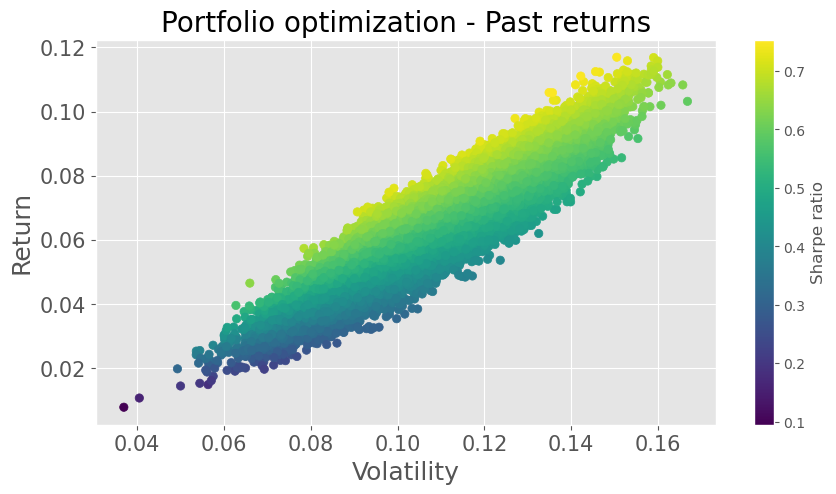

In [29]:
plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Past returns', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

## Ottimizzazione con rendimenti attesi

### Creazione rendimenti attesi - Media di media e mediana delle previsioni a 1 anno del sondaggio - 31 dicembre  2023

In [30]:
d = {'LEG1TREU': 0.028, 'LEGATREH':0.04, 'LG30TREH': 0.068, 'MXWOHEUR':0.066,'NDDUWI':0.076,
     'NCUDWI': 0.09, 'NDUEEGF': 0.081}
means_exp = pd.Series(data=d, index=['LEG1TREU','LEGATREH', 'LG30TREH','MXWOHEUR','NDDUWI','NCUDWI','NDUEEGF'])
means_exp

LEG1TREU    0.028
LEGATREH    0.040
LG30TREH    0.068
MXWOHEUR    0.066
NDDUWI      0.076
NCUDWI      0.090
NDUEEGF     0.081
dtype: float64

### Ottimizzazione

In [31]:
portfolio_returns = []
portfolio_risks = []
sharpe_ratios = []
portfolio_weights = []
rf_exp = 0.035
target = 0.06

for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(returns.columns))
    weights =np.round((weights / np.sum(weights)), 3)
    portfolio_weights.append(weights)
    annualized_return = np.sum(means_exp * weights)
    portfolio_returns.append(annualized_return)
    portfolio_variance = np.dot(weights.T, np.dot(mat_cov, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risks.append(portfolio_standard_deviation)
    sharpe_ratio = (annualized_return - rf_exp) / portfolio_standard_deviation
    sharpe_ratios.append(sharpe_ratio)

In [32]:
portfolio_returns = np.array(portfolio_returns)
portofolio_risks = np.array(portfolio_risks)
sharpe_ratios = np.array(sharpe_ratios)

In [33]:
#portfoglio metrics

portfolio_metrics = [portfolio_returns, portfolio_risks, sharpe_ratios, portfolio_weights]
portfolios_df = pd.DataFrame(portfolio_metrics).T
portfolios_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']

min_risk = portfolios_df.iloc[portfolios_df['Risk'].astype(float).idxmin()]
highest_return = portfolios_df.iloc[portfolios_df['Return'].astype(float).idxmax()]
highest_sharpe = portfolios_df.iloc[portfolios_df['Sharpe'].astype(float).idxmax()]
#target_risk = portfolio_df.iloc[(df['Risk']-target).abs().argsort()[:2]]


In [34]:
minr = float(input("Minima tolleranza al rischio: "))

maxr = float(input("Massima tolleranza al rischio: "))

Minima tolleranza al rischio:  0.06
Massima tolleranza al rischio:  0.065


In [35]:
risk_df_exp = portfolios_df.copy()
risk_df_exp = risk_df_exp.drop(risk_df_exp[(risk_df_exp.Risk < minr) | (risk_df_exp.Risk > maxr)].index)

In [36]:
rtn_risk_df_exp = risk_df_exp.sort_values(by = 'Return', ascending=False)

In [37]:
rtn_risk_df_exp = rtn_risk_df_exp.head(10)
rtn_risk_df_exp

,Return,Risk,Sharpe,Weights
31345,0.051741,0.064519,0.259475,"[0.259, 0.278, 0.3, 0.028, 0.006, 0.024, 0.105]"
3948,0.051587,0.064105,0.258749,"[0.315, 0.212, 0.305, 0.017, 0.017, 0.04, 0.093]"
27051,0.051183,0.064299,0.251683,"[0.232, 0.39, 0.16, 0.004, 0.042, 0.091, 0.081]"
10621,0.051114,0.064058,0.251553,"[0.258, 0.295, 0.261, 0.038, 0.047, 0.009, 0.092]"
37621,0.050859,0.06415,0.247219,"[0.279, 0.28, 0.248, 0.011, 0.133, 0.02, 0.029]"
24115,0.050822,0.063977,0.247307,"[0.255, 0.351, 0.157, 0.01, 0.099, 0.046, 0.082]"
37553,0.050695,0.063374,0.247657,"[0.295, 0.311, 0.174, 0.017, 0.019, 0.086, 0.097]"
14374,0.050662,0.062561,0.250347,"[0.314, 0.253, 0.307, 0.012, 0.005, 0.088, 0.022]"
11795,0.050508,0.063564,0.243973,"[0.312, 0.283, 0.166, 0.031, 0.045, 0.055, 0.108]"
10678,0.050335,0.064482,0.237818,"[0.332, 0.271, 0.098, 0.038, 0.084, 0.034, 0.143]"


In [38]:
rtn_risk_df_exp[['LEG1TREU','LEGATREH', 'LG30TREH', 'MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(rtn_risk_df_exp.Weights.tolist(), index=rtn_risk_df_exp.index)
rtn_risk_df_exp.drop(['Weights'], axis=1, inplace=True)

In [39]:
rtn_risk_df_exp.to_excel('tolerance_risk_returns_exp.xlsx', sheet_name='Best Returns', index=False, startrow=0)

In [43]:
sharpe_risk_df_exp = risk_df_exp.sort_values(by = 'Sharpe', ascending=False)

In [44]:
sharpe_risk_df_exp = sharpe_risk_df_exp.head(10)
sharpe_risk_df_exp

,Return,Risk,Sharpe,Weights
31345,0.051741,0.064519,0.259475,"[0.259, 0.278, 0.3, 0.028, 0.006, 0.024, 0.105]"
3948,0.051587,0.064105,0.258749,"[0.315, 0.212, 0.305, 0.017, 0.017, 0.04, 0.093]"
27051,0.051183,0.064299,0.251683,"[0.232, 0.39, 0.16, 0.004, 0.042, 0.091, 0.081]"
10621,0.051114,0.064058,0.251553,"[0.258, 0.295, 0.261, 0.038, 0.047, 0.009, 0.092]"
14374,0.050662,0.062561,0.250347,"[0.314, 0.253, 0.307, 0.012, 0.005, 0.088, 0.022]"
4015,0.050323,0.061471,0.24927,"[0.327, 0.198, 0.367, 0.017, 0.053, 0.016, 0.021]"
37553,0.050695,0.063374,0.247657,"[0.295, 0.311, 0.174, 0.017, 0.019, 0.086, 0.097]"
24115,0.050822,0.063977,0.247307,"[0.255, 0.351, 0.157, 0.01, 0.099, 0.046, 0.082]"
37621,0.050859,0.06415,0.247219,"[0.279, 0.28, 0.248, 0.011, 0.133, 0.02, 0.029]"
11795,0.050508,0.063564,0.243973,"[0.312, 0.283, 0.166, 0.031, 0.045, 0.055, 0.108]"


In [45]:
sharpe_risk_df_exp[['LEG1TREU','LEGATREH', 'LG30TREH', 'MXWOHEUR','NDDUWI', 'NCUDWI', 'NDUEEGF']] = pd.DataFrame(sharpe_risk_df_exp.Weights.tolist(), index= sharpe_risk_df_exp.index)
sharpe_risk_df_exp.drop(['Weights'], axis=1, inplace=True)

In [46]:
sharpe_risk_df_exp.to_excel('tolerance_risk_sharpe_exp.xlsx', sheet_name='Best Sharpes', index=False, startrow=0)

In [47]:
print('Lowest risk')
print(min_risk)
print(list(returns))
min_risk.to_excel('min_risk_exp.xlsx', sheet_name='Lowest risk', startrow=0)

print('')

print('Highest return')
print(highest_return)
print(list(returns))
highest_return.to_excel('high_ret_exp.xlsx', sheet_name='Highest return', startrow=0)


print('')
      
print('Highest Sharpe ratio')
print(highest_sharpe)
highest_sharpe.to_excel('high_sharpe_exp.xlsx', sheet_name='Highest Sharpe ', startrow=0)
print(list(returns))

print('')


Lowest risk
Return                                             0.044654
Risk                                               0.049256
Sharpe                                             0.195996
Weights    [0.493, 0.218, 0.082, 0.021, 0.003, 0.004, 0.18]
Name: 9025, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest return
Return                                            0.083304
Risk                                              0.164447
Sharpe                                            0.293736
Weights    [0.038, 0.004, 0.021, 0.02, 0.06, 0.586, 0.272]
Name: 11687, dtype: object
['LEG1TREU', 'LEGATREH', 'LG30TREH', 'MXWOHEUR', 'NDDUWI', 'NCUDWI', 'NDUEEGF']

Highest Sharpe ratio
Return                                              0.068908
Risk                                                0.106995
Sharpe                                              0.316911
Weights    [0.011, 0.134, 0.454, 0.021, 0.055, 0.053, 0.272]
Name: 32204, dtyp

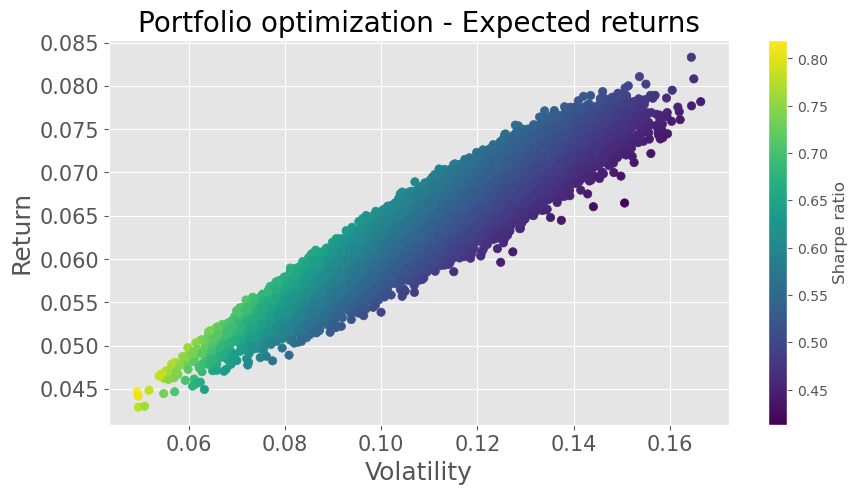

In [48]:
plt.figure(figsize = (10,5))
plt.scatter(portfolio_risks, portfolio_returns, 
           c = (portfolio_returns - rf)/ portfolio_risks)
plt.title('Portfolio optimization - Expected returns', fontsize = 20)
plt.xlabel('Volatility', fontsize = 18)
plt.ylabel('Return', fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.colorbar(label = 'Sharpe ratio')
plt.show()

In [129]:
rf

0.004276919806061063

In [130]:
rf_exp

0.035